# **Moniqo Group Project**

### **Data Cleaning** 



***Data description:*** entire journey of a microfinance customer 
- **LoanId**                            (int64): Unique identifier for each loan
- **AmountDisbursed**                   (int64): Amount actually released to the borrower
- **Interest**                          (int64): Amount charged by the lender for borrowing the loan.
- **LoanBalance**                     (float64): Remaining outstanding principal+ interest(current)
- **BorrowDate**                       (object): Date the loan was borrowed 
- **Product**                          (object): Loan product type/category (5-7-10 weeks credit ease)
- **Branch**                           (object): Branch/service point managing the loan
- **ClearDate**                        (object): Scheduled date for the borrower to complete repayment
- **CustomerId**                        (int64): Unique identifier assigned to each customer.        
- **Gender**                           (object): Demographic attribute indicating the customer’s gender.
- **LoanLimit**                         (int64): The maximum loan amount the customer is currently eligible for
- **CreditScore**                       (int64): A numerical score representing the estimated risk of lending to the customer (higher score = better creditworthiness)
- **loan_repayment_txn_count**          (int64): Number of loan repayment transactions made by borrower 
- **loan_repayment_total_paid**         (int64): Total amount of money paid toward the loan so far (may include principal and interest)
- **loan_repayment_first_payment**     (object): Date when the borrower made their first loan repayment
- **loan_repayment_last_payment**      (object): Date of the most recent loan payment 
- **loan_overpayment**                  (int64): Amount paid in excess of the required repayment 
- **missed_instalments**              (float64): Number of repayment installments that were missed or paid late
- **Industry**                         (object): The economic sector in which the customers' business operates
- **Business Type**                    (object): Specific type of customers' business activity within the industry
- **Year of Establishment**            (int64):  Year in which the business was founded

# 1. Importing & Reading Data

In [19]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


pd.set_option("display.max_columns", 100)

In [20]:
import sys, sklearn
print(sys.executable)
print(sklearn.__version__)


c:\Users\kunal\AppData\Local\spyder-6\envs\spyder-runtime\python.exe
1.7.2


In [21]:
# Load the main dataset 
df = pd.read_csv('data/repeat_loans_final.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment
0,951920,6000,1750,7750.0,11/29/2025,5 WEEKS CREDIT EASE,ENGINEER,1/3/2026,1819,FEMALE,8000,3500,1,500,29/11/2025,29/11/2025,0,5.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017
1,951902,4000,1250,5250.0,11/28/2025,5 WEEKS CREDIT EASE,MOLO,1/2/2026,1818,FEMALE,9600,2500,1,1550,28/11/2025,28/11/2025,0,4.0,Food & Hospitality,Retail Shop,2019
2,949962,4000,1250,5250.0,11/26/2025,5 WEEKS CREDIT EASE,ENGINEER,31/12/2025,1815,FEMALE,8000,3500,1,1350,26/11/2025,26/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014
3,949189,4000,1250,5250.0,11/25/2025,5 WEEKS CREDIT EASE,MOLO,30/12/2025,1814,FEMALE,10000,1500,1,1000,25/11/2025,25/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018
4,948984,4000,1250,5250.0,11/24/2025,5 WEEKS CREDIT EASE,MOLO,29/12/2025,1813,FEMALE,10000,1500,1,1550,24/11/2025,24/11/2025,0,4.0,Business & Information,Bureau & Publishing Services,2018


# 2. Loading and Initial Exploration

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LoanId                        3572 non-null   int64  
 1   AmountDisbursed               3572 non-null   int64  
 2   Interest                      3572 non-null   int64  
 3   LoanBalance                   3572 non-null   float64
 4   BorrowDate                    3572 non-null   object 
 5   Product                       3572 non-null   object 
 6   Branch                        3572 non-null   object 
 7   ClearDate                     3572 non-null   object 
 8   CustomerId                    3572 non-null   int64  
 9   Gender                        3572 non-null   object 
 10  LoanLimit                     3572 non-null   int64  
 11  CreditScore                   3572 non-null   int64  
 12  loan_repayment_txn_count      3572 non-null   int64  
 13  loa

In [23]:
# Use df.describe() to get descriptive statistics (mean, median, quartiles, etc.) for numerical columns.
df.describe()

,LoanId,AmountDisbursed,Interest,LoanBalance,CustomerId,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_overpayment,missed_instalments,Year of Establishment
count,3572.000000,3572.00000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3570.000000,3572.000000
mean,797454.956047,8330.62710,2840.173292,742.626431,1220.655655,13788.437850,2629.423292,11.528835,10400.055991,227.473124,2.477031,2018.017357
std,84628.990534,4886.57484,2342.248151,2861.775577,309.334425,10376.976115,2237.083252,11.747340,7088.355892,1316.093494,2.873470,3.016473
min,313772.000000,3000.00000,1000.000000,0.000000,23.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,2010.000000
25%,725231.000000,5000.00000,1500.000000,0.000000,1057.000000,8000.000000,2000.000000,6.000000,6500.000000,0.000000,0.000000,2016.000000
50%,798200.500000,7000.00000,2000.000000,0.000000,1232.000000,11000.000000,2000.000000,8.000000,9000.000000,0.000000,0.000000,2018.000000
75%,865180.750000,10000.00000,3000.000000,0.000000,1443.000000,16000.000000,2500.000000,14.000000,12750.000000,0.000000,5.000000,2020.000000
max,952310.000000,60000.00000,25000.000000,45500.000000,1819.000000,117000.000000,20000.000000,207.000000,74000.000000,21940.000000,12.000000,2025.000000


In [24]:
# Check the data type of each column
df.dtypes

LoanId                            int64
AmountDisbursed                   int64
Interest                          int64
LoanBalance                     float64
BorrowDate                       object
Product                          object
Branch                           object
ClearDate                        object
CustomerId                        int64
Gender                           object
LoanLimit                         int64
CreditScore                       int64
loan_repayment_txn_count          int64
loan_repayment_total_paid         int64
loan_repayment_first_payment     object
loan_repayment_last_payment      object
loan_overpayment                  int64
missed_instalments              float64
Industry                         object
Business Type                    object
Year of Establishment             int64
dtype: object

In [25]:
# Convert date columns to pandas datetime format (MM/DD/YYYY) 

# BorrowDate is mostly MM/DD/YYYY
df['BorrowDate'] = pd.to_datetime(df['BorrowDate'])

# These are mostly DD/MM/YYYY
df['ClearDate'] = pd.to_datetime(df['ClearDate'], errors="coerce", dayfirst = True)
df['loan_repayment_first_payment'] = pd.to_datetime(df['loan_repayment_first_payment'], errors="coerce", dayfirst = True)
df['loan_repayment_last_payment'] = pd.to_datetime(df['loan_repayment_last_payment'], errors="coerce", dayfirst = True)

#Verify data types after converting
df.dtypes

LoanId                                   int64
AmountDisbursed                          int64
Interest                                 int64
LoanBalance                            float64
BorrowDate                      datetime64[ns]
Product                                 object
Branch                                  object
ClearDate                       datetime64[ns]
CustomerId                               int64
Gender                                  object
LoanLimit                                int64
CreditScore                              int64
loan_repayment_txn_count                 int64
loan_repayment_total_paid                int64
loan_repayment_first_payment    datetime64[ns]
loan_repayment_last_payment     datetime64[ns]
loan_overpayment                         int64
missed_instalments                     float64
Industry                                object
Business Type                           object
Year of Establishment                    int64
dtype: object

In [26]:
# Categorical columns
categorical_cols = ['Product', 'Branch', 'Gender', 'Industry', 'Business Type']

# Convert categorical columns type to string & standardize categorical text
df[categorical_cols] = (df[categorical_cols]
                               .astype('string')
                               .apply(lambda s: s.str.strip().str.lower()))

In [27]:
# Rename columns 
df = df.rename(columns={"Business Type": "BusinessType", 
                             "Year of Establishment": "YearEstablished", 
                             "missed_instalments":"MissedInstalments",
                             })

In [28]:
df.columns

Index(['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate',
       'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit',
       'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid',
       'loan_repayment_first_payment', 'loan_repayment_last_payment',
       'loan_overpayment', 'MissedInstalments', 'Industry', 'BusinessType',
       'YearEstablished'],
      dtype='object')

## 3.1. Handle Missing Values
#### a. Identify missing values

In [29]:
# Identify missing values 
df.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               2
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

In [30]:
# Impute missing values (replace with most frequent value)
df['MissedInstalments'] = df['MissedInstalments'].fillna(df['MissedInstalments'].mode()[0])


In [31]:
df.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

In [32]:
# Identify NaN values
print(df.isna().sum())

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64


In [33]:
# Check duplicates & To see the actual duplicate rows:
duplicate_rows = df[df.duplicated()]
duplicate_rows

# No duplicates detected

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished


## 3.2. Outlier Detection & Handling

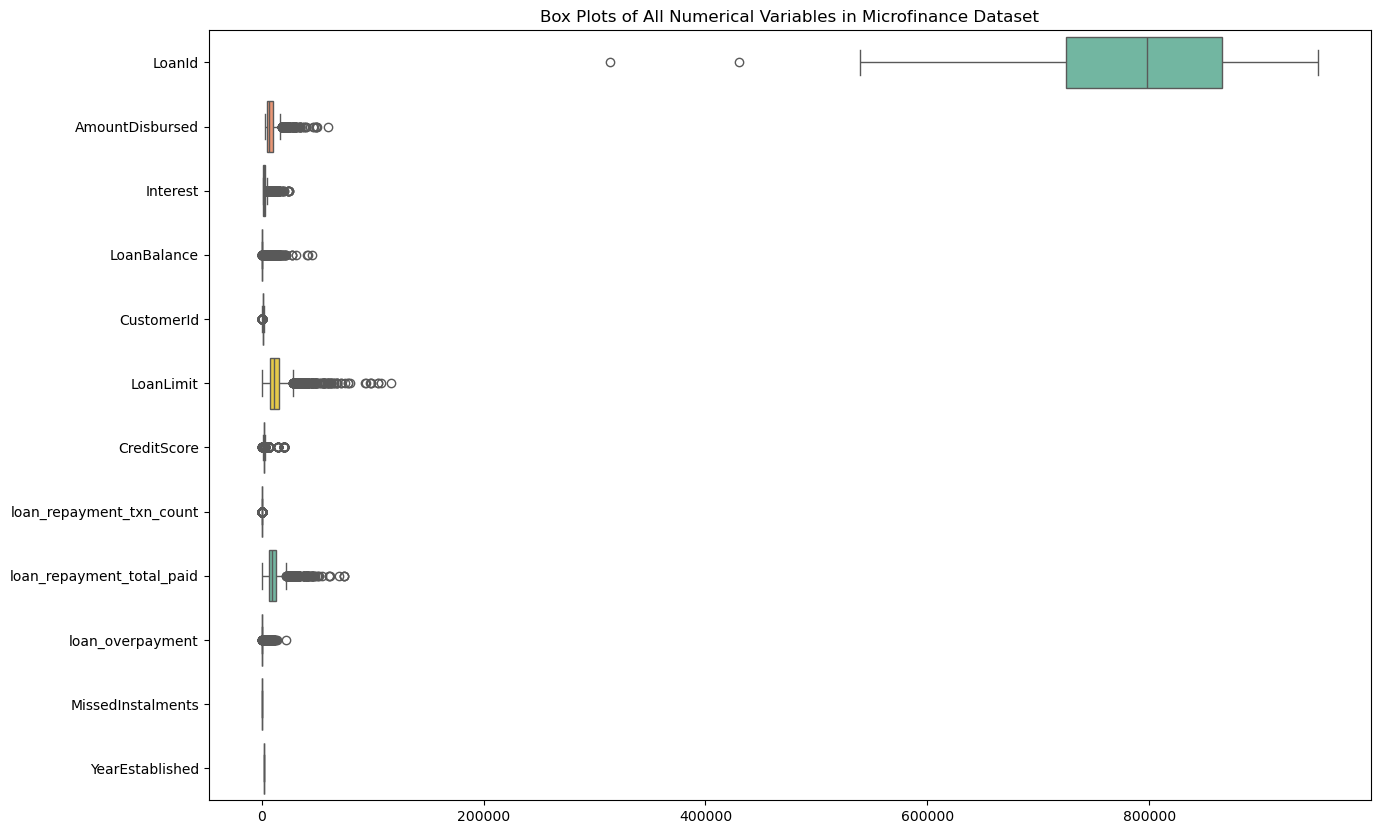

In [34]:
# Outliers for numerical data 

numerical_data = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))  

sns.boxplot(data=numerical_data, orient="h", palette="Set2") 

plt.title('Box Plots of All Numerical Variables in Microfinance Dataset')

plt.show()

In [35]:
# Outliers Identification using IQR 

def find_outliers_iqr(data, column):
  """
  Identifies outliers in a DataFrame column using the IQR method.

  Args:
      data: Pandas DataFrame.
      column: Name of the column to check for outliers.

  Returns:
      A Series of boolean values indicating outliers.
  """
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (data[column] < lower_bound) | (data[column] > upper_bound)

# --- Identify outliers in all numerical columns ---

# Select only the numerical columns
numerical_data = df.select_dtypes(include=[np.number])

for column in numerical_data.columns:
    outliers = find_outliers_iqr(df, column)
    print(f"Number of outliers in '{column}': {outliers.sum()}")

Number of outliers in 'LoanId': 2
Number of outliers in 'AmountDisbursed': 157
Number of outliers in 'Interest': 374
Number of outliers in 'LoanBalance': 417
Number of outliers in 'CustomerId': 99
Number of outliers in 'LoanLimit': 235
Number of outliers in 'CreditScore': 230
Number of outliers in 'loan_repayment_txn_count': 239
Number of outliers in 'loan_repayment_total_paid': 194
Number of outliers in 'loan_overpayment': 162
Number of outliers in 'MissedInstalments': 0
Number of outliers in 'YearEstablished': 0


Treatment: Decide whether to remove, transform, or keep outliers based on their nature and the analysis goals.

**Features with outliers to deal with:**
- AmountDisbursed (capping)
- LoanBalance
- loan_repayment_total_paid
- LoanLimit (remove 0), anything below loan limit < 1000
- Product Type (remove 12 WEEKS - SME 1 & 2)

#### a. AmountDisbursed

In [36]:
# Defining outlier's range for (AmountDisbursed)
Q1 = df['AmountDisbursed'].quantile(0.25)
Q3 = df['AmountDisbursed'].quantile(0.75)
IQR = Q3 - Q1

# Any value outside (lower_bound) & (upper_bound) is considered as an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ad_outliers= df[(df['AmountDisbursed'] < lower_bound) | (df['AmountDisbursed'] > upper_bound)]

# How many times each outlier value appears
ad_outliers['AmountDisbursed'].value_counts()

AmountDisbursed
20000    48
30000    20
18000    16
25000    14
22000     9
23000     8
27000     5
35000     5
21000     4
28000     4
19000     4
49000     3
32000     2
26000     2
38000     2
40000     2
47000     1
24000     1
60000     1
50000     1
36000     1
46000     1
31000     1
34000     1
29000     1
Name: count, dtype: int64

In [37]:
# (Create a copy of the data to avoid modifying the original)
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[~outliers]

In [38]:
# (Create another copy for this method)
df_capped = df.copy()
upper_cap = df['AmountDisbursed'].quantile(0.95)  # Cap at 95th percentile 

df_capped['AmountDisbursed'] = np.where(
    df_capped['AmountDisbursed'] > upper_cap,
    upper_cap,
    df_capped['AmountDisbursed'])

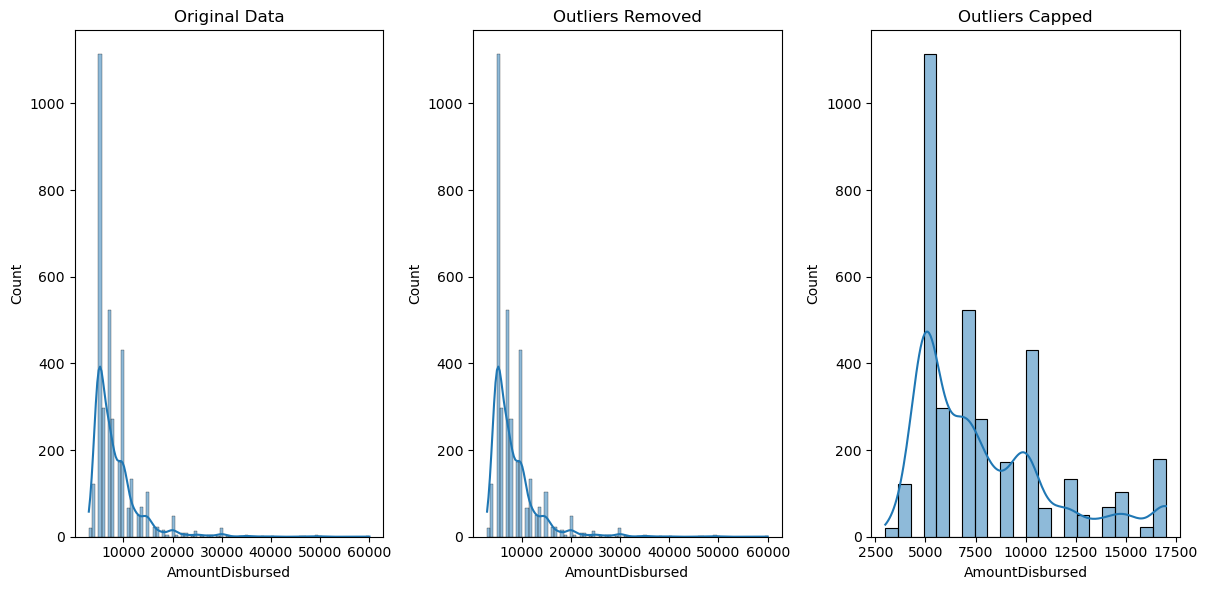

In [ ]:
# Visualize results 

plt.figure(figsize=(12, 6))

# Plot1. Orignial Data
plt.subplot(1, 3, 1)
sns.histplot(df['AmountDisbursed'], kde=True)
plt.title('Original Data')

# Plot2. Outliers Removed
plt.subplot(1, 3, 2)
sns.histplot(df_no_outliers["AmountDisbursed"], kde=True)
plt.title('Outliers Removed')

# Plot2. Outliers Capped
plt.subplot(1, 3, 3)
sns.histplot(df_capped["AmountDisbursed"], kde=True)
plt.title('Outliers Capped')

plt.tight_layout()
plt.show()

#### b. loan_repayment_total_paid

In [40]:
df['loan_repayment_total_paid'].describe()

count     3572.000000
mean     10400.055991
std       7088.355892
min         13.000000
25%       6500.000000
50%       9000.000000
75%      12750.000000
max      74000.000000
Name: loan_repayment_total_paid, dtype: float64

**Observations:**
- Strong right skew -> mean (10,400) -> median (9,000)
- Very large max (74,000) compared to Q3 (12,750)
- Low repayment values (e.g., 35) were retained as they represent valid customer behavior. A log transformation was applied to reduce skewness and stabilize variance across the distribution

**Way forward:** 
- EDA/Reporting -> use original column 
- Modeling -> use log version

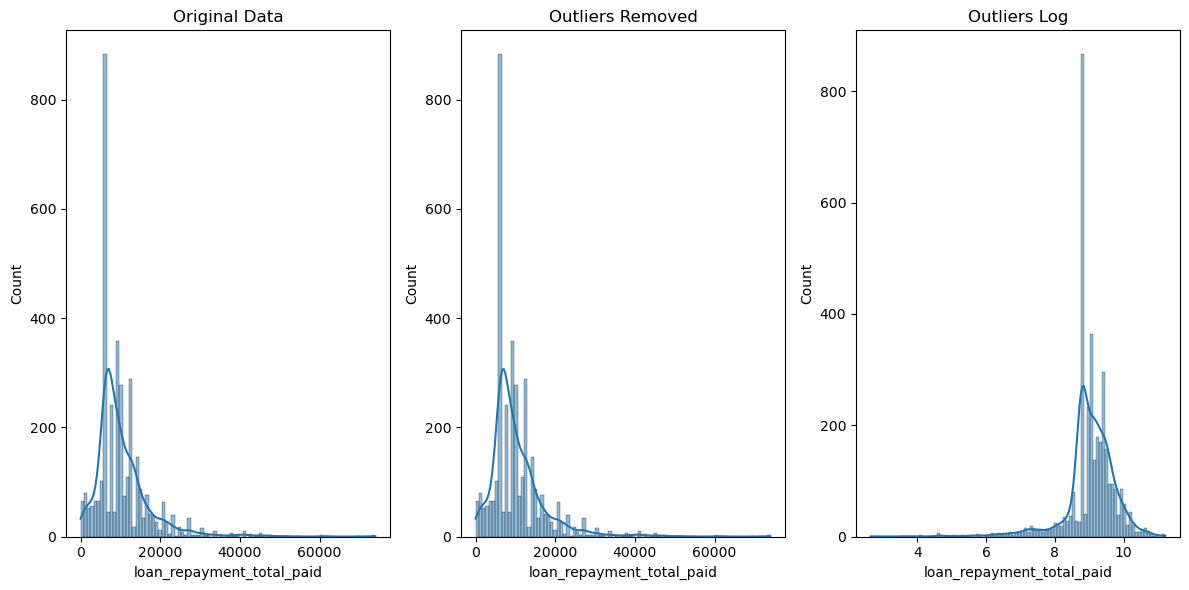

In [ ]:
# log transformation
df_log = df.copy()
df_log['loan_repayment_total_paid'] = np.log1p(
    df_log['loan_repayment_total_paid']
)

# Visualize results 

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['loan_repayment_total_paid'], kde=True)
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.histplot(df_no_outliers["loan_repayment_total_paid"], kde=True)
plt.title('Outliers Removed')

plt.subplot(1, 3, 3)
sns.histplot(df_log["loan_repayment_total_paid"], kde=True)
plt.title('Outliers Log')

plt.tight_layout()

In [42]:
df_log['loan_repayment_total_paid'].describe()

count    3572.000000
mean        9.032843
std         0.754597
min         2.639057
25%         8.779711
50%         9.105091
75%         9.453365
max        11.211834
Name: loan_repayment_total_paid, dtype: float64

#### c. LoanLimit

In [43]:
df['LoanLimit'].describe()

count      3572.000000
mean      13788.437850
std       10376.976115
min           0.000000
25%        8000.000000
50%       11000.000000
75%       16000.000000
max      117000.000000
Name: LoanLimit, dtype: float64

**Industry Insights:** 
- A customer with **LoanLimit = 0** cannot receive a loan, so this value does not represent an actual lending capacity. Therefore, zero values were treated as missing and handled accordingly.
- Loan limits below 1,000 were reviewed against business rules and treated as invalid observations accordingly. 

**Observations:** 
- 0 is extremely far from the rest of the distribution. 
- Anything < 1,000 is far outside the normal range (likely the same issue as 0), Q1 = 8000

**Way forward:** 
- drop 0 & <1000 values

In [44]:
# Mark invalid values as missing 
df['LoanLimit'] = df['LoanLimit'].replace(0, np.nan)
df.loc[df['LoanLimit'] < 1000, 'LoanLimit'] = np.nan

# Drop missing values
df = df.dropna(subset=['LoanLimit'])

# Reset index
df = df.reset_index(drop=True)

#### d. Product

In [45]:
df['Product'].value_counts()

Product
5 weeks credit ease     2580
7 weeks credit ease      701
10 weeks credit ease     186
12 weeks credit ease       3
sme - 3 months             1
sme - 4 months             1
Name: count, dtype: Int64

In [46]:
# Remove SME - 3 MONTHS and SME - 6 MONTHS products as they have very few samples
df = df[~df['Product'].isin(['SME - 3 MONTHS', 'SME - 6 MONTHS'])].copy()

#### e. LoanBalance

In [47]:
df['LoanBalance'].value_counts()

LoanBalance
0.00        3064
7500.00        8
5250.00        7
4650.00        6
5200.00        6
            ... 
1478.00        1
4900.00        1
27300.00       1
6060.00        1
3777.01        1
Name: count, Length: 300, dtype: int64

In [ ]:
# Defining outliers for (LoanBalance)
Q1 = df['LoanBalance'].quantile(0.25)
Q3 = df['LoanBalance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_LoanBalance= df[(df['LoanBalance'] < lower_bound) | (df['LoanBalance'] > upper_bound)]

# How many times each outlier value appears
outliers_LoanBalance['LoanBalance'].value_counts()

LoanBalance
7500.00     8
5250.00     7
3900.00     6
4650.00     6
5200.00     6
           ..
1478.00     1
4900.00     1
27300.00    1
6060.00     1
3777.01     1
Name: count, Length: 299, dtype: int64

# Save new dataset

In [49]:
df.to_csv('data/cleaned_dataset.csv', index=False)

In [50]:
df['LoanBalance'].describe()

count     3472.000000
mean       756.391593
std       2892.413829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45500.000000
Name: LoanBalance, dtype: float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        3472 non-null   int64         
 1   AmountDisbursed               3472 non-null   int64         
 2   Interest                      3472 non-null   int64         
 3   LoanBalance                   3472 non-null   float64       
 4   BorrowDate                    3472 non-null   datetime64[ns]
 5   Product                       3472 non-null   string        
 6   Branch                        3472 non-null   string        
 7   ClearDate                     3472 non-null   datetime64[ns]
 8   CustomerId                    3472 non-null   int64         
 9   Gender                        3472 non-null   string        
 10  LoanLimit                     3472 non-null   float64       
 11  CreditScore                   

In [ ]:
df.shape

# original: (3572, 21)
# new: (3472, 21)

(3472, 21)

# PROJECT EDA

**Pocess to explore the data and identify patterns in the data**

In [53]:
# Load the main dataset 
df = pd.read_csv('data/cleaned_dataset.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


In [ ]:
# Convert date columns to datetime format for easier analysis

# BorrowDate:  MM/DD/YYYY (Keep dayfirst=False)
df["BorrowDate"] = pd.to_datetime(df["BorrowDate"], errors="coerce", dayfirst=False)

# problematic columns: Use format='mixed' to handle the mix of DD/MM/YYYY and YYYY-MM-DD
df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True, format='mixed')
df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True, format='mixed')

# ClearDate:  YYYY-MM-DD
df["ClearDate"] = pd.to_datetime(df["ClearDate"], errors="coerce", format="%Y-%m-%d")

# Check the result
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


# Final data cleanup

In [ ]:
# More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.

df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

# **EDA** 

In [ ]:
# The data logs the same loan twice. We keep only the first instance.
df = df.drop_duplicates(subset=['CustomerId', 'BorrowDate'], keep='first')

# A loan cannot be cleared BEFORE it was borrowed.
df = df[df['ClearDate'] >= df['BorrowDate']].copy()

# A business established in 2024 cannot borrow money in 2023.
df = df[df['YearEstablished'] <= df['BorrowDate'].dt.year].copy()

# Cleanup to remove Product types (sme - 3 months, sme - 4 months and 12 weeks credit ease) fron the dataset
df = df[~df['Product'].isin(['sme - 3 months', 'sme - 4 months', '12 weeks credit ease'])]
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1565 entries, 0 to 3469
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        1565 non-null   int64         
 1   AmountDisbursed               1565 non-null   int64         
 2   Interest                      1565 non-null   int64         
 3   LoanBalance                   1565 non-null   float64       
 4   BorrowDate                    1565 non-null   datetime64[ns]
 5   Product                       1565 non-null   object        
 6   Branch                        1565 non-null   object        
 7   ClearDate                     1565 non-null   datetime64[ns]
 8   CustomerId                    1565 non-null   int64         
 9   Gender                        1565 non-null   object        
 10  LoanLimit                     1565 non-null   float64       
 11  CreditScore                   1565 

(1565, 22)

Number of defaulters: 133
Percentage of Defaults vs Non-Defaults:
 0    91.501597
1     8.498403
Name: proportion, dtype: float64


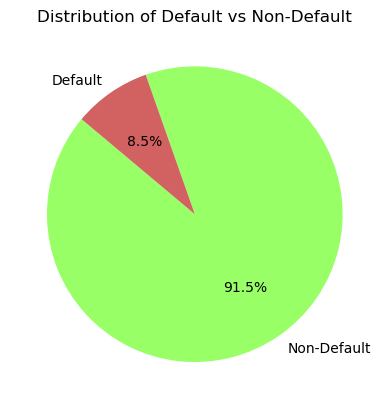

In [ ]:
# Additional data cleaning
# Understading the target variable Default where default is when ClearDate is greater than 2025-12-15 and LoanBalance is greater than 0
defaulters = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)
print("Number of defaulters:", defaulters.sum())

# Calculate the percentage of defaults vs non-defaults
default_counts = defaulters.value_counts(normalize=True) * 100
print("Percentage of Defaults vs Non-Defaults:\n", default_counts)

# Visualize the distribution of the target variable as a pie chart
plt.pie(default_counts, labels=['Non-Default', 'Default'], autopct='%1.1f%%', startangle=140, colors=["#99ff66","#d26161"])
plt.title('Distribution of Default vs Non-Default')
plt.show()

In [58]:
# Introduce bool (1,0) for isDefault
df['IsDefault'] = defaulters

## **Heatmap**

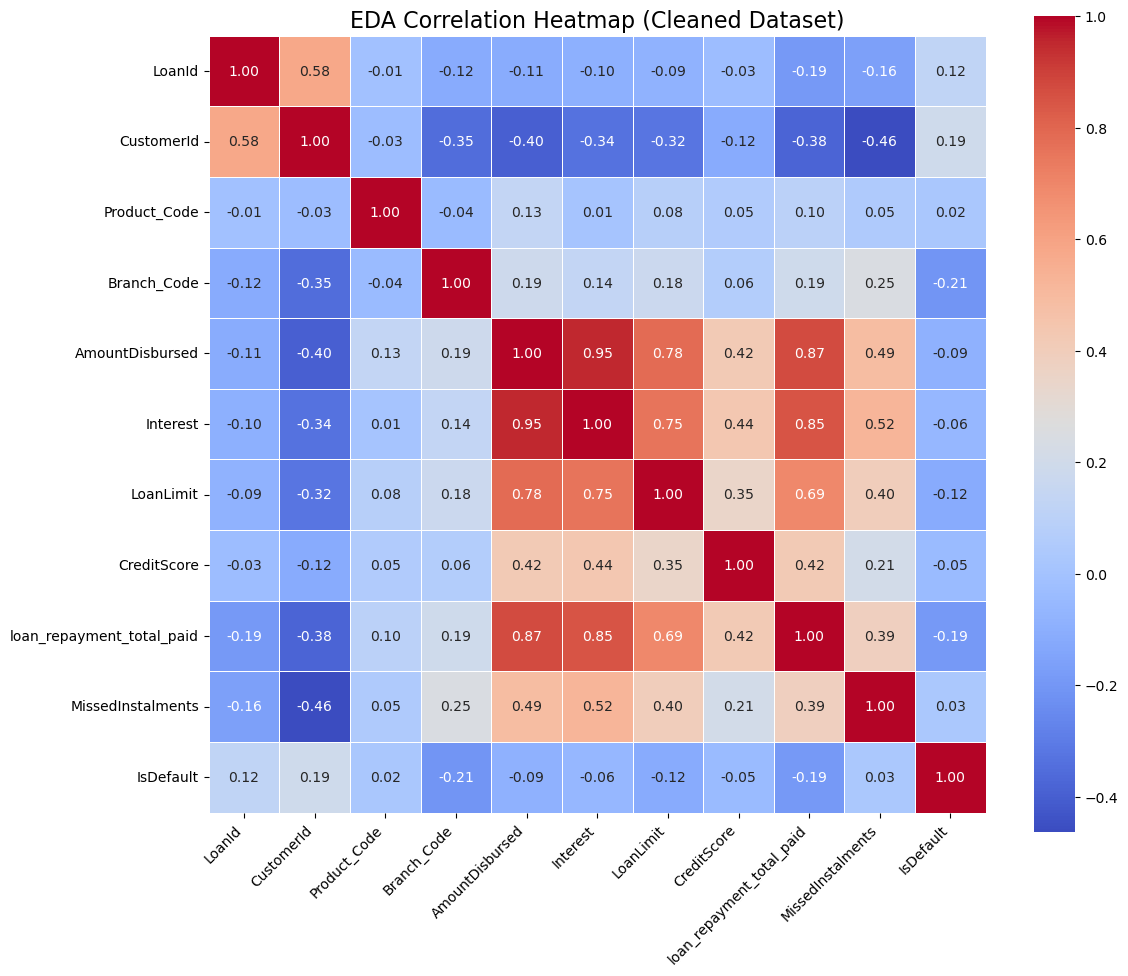

In [59]:
# Convert categorical columns to numerical codes
df['Product_Code'] = df['Product'].astype('category').cat.codes
df['Branch_Code'] = df['Branch'].astype('category').cat.codes

# Columns to include in the heatmap
target_cols = [
    'LoanId', 'CustomerId', 'Product_Code', 'Branch_Code',
    'AmountDisbursed', 'Interest', 'LoanLimit', 'CreditScore',
    'loan_repayment_total_paid', 'MissedInstalments', 'IsDefault'
]

# Calculate the correlation matrix
corr_matrix = df[target_cols].corr()

# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

plt.title('EDA Correlation Heatmap (Cleaned Dataset)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Print and save the heatmap
plt.show()

## **Hypothesis 01.** 
### Woman has high risk to make default micro finance due to restricted social power

**Conclusion:** Company has 131 more male client than female client, while few female clients have higher interest amount than male.

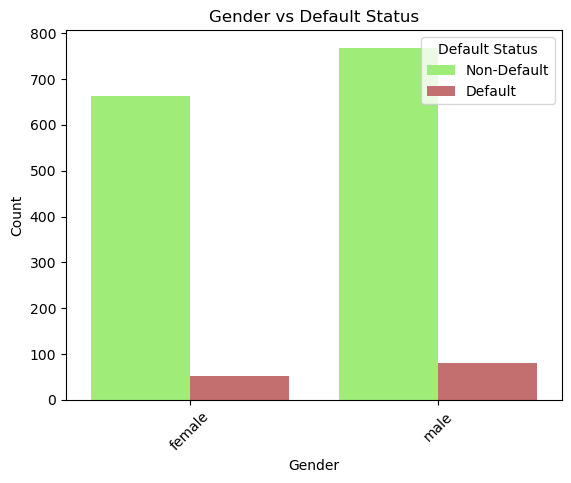

In [60]:
# Analyze relationships between Gender and the defaul
sns.countplot(data=df, x='Gender', hue=defaulters, palette=["#99ff66","#d26161"])
plt.title('Gender vs Default Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.show()

## **Hypothesis 02.** 
### Customer who has high credit score may make less miss instalments

**Conclusion:** This suggests that high credit scores do not necessarily correlate with lower missed instalments.High credit scores are also associated with higher average missed instalments as the amount of loan is higher than lower credit scores.

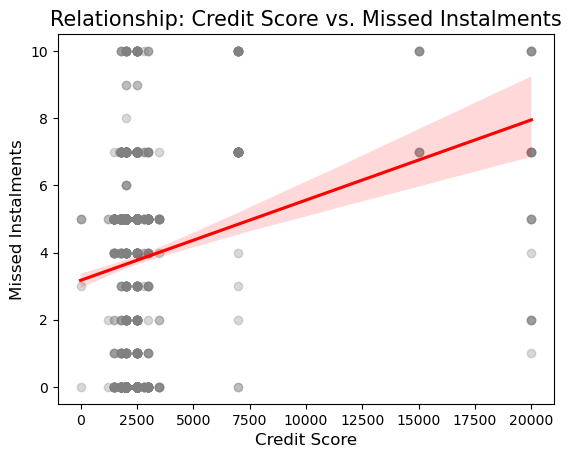

In [61]:
# Visualization: Scatter plot with regression line - Credit Score vs. Missed Instalments
sns.regplot(data=df, x='CreditScore', y='MissedInstalments', 
            scatter_kws={'alpha':0.3, 'color':'gray'}, line_kws={'color':'red'})

plt.title('Relationship: Credit Score vs. Missed Instalments', fontsize=15)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Missed Instalments', fontsize=12)
plt.show()

## **Hypothesis 03.** 
##### Shorter-term products are associated with lower default risk

**Conclusion**: Clients with stronger repayment capacity are more likely to choose the 5-week Credit Ease product instead of defaulting on microfinance loans.

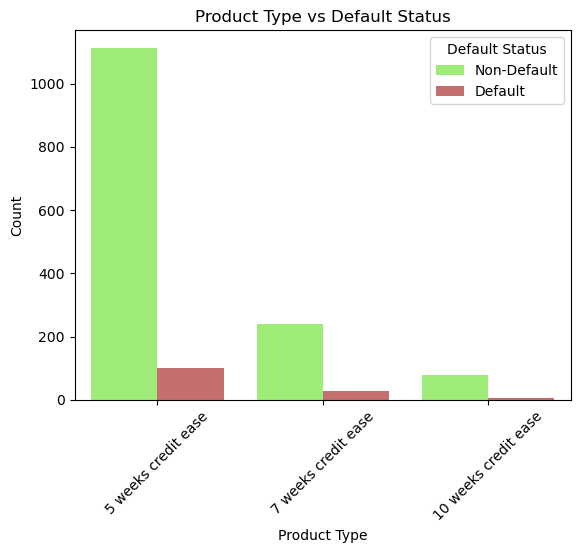

In [62]:
# Analyze relationships between Product and the default
sns.countplot(data=df, x='Product', hue=defaulters, palette=["#99ff66","#d26161"])
plt.title('Product Type vs Default Status')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.show()

## **Hypothesis 04.** 

##### Risk of default micro finance is different by branch as their lifestlye, quality of life, average salary might be different.

**Conclusion**: Molo has higher miss instalments rate than Engineer, while default rate is lower than Engineer

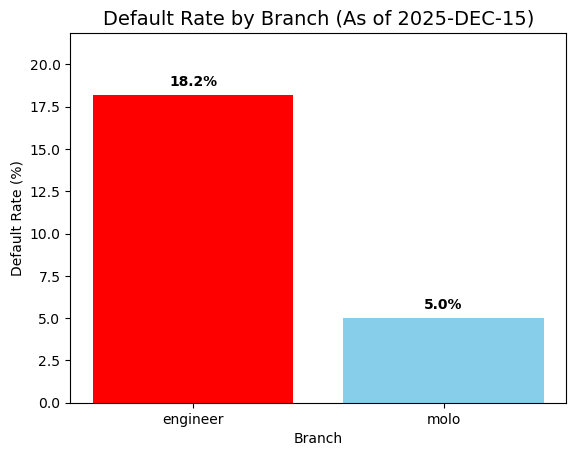

In [63]:
# Visualizing the percentage of defaulters/number of loans based on branch as a chart
# Calculate Default Rate by Branch
branch_stats = defaulters.groupby(df['Branch']).mean() * 100

# Visualization
colors = ['red', 'skyblue']

plt.bar(branch_stats.index, branch_stats.values, color=colors)

plt.title('Default Rate by Branch (As of 2025-DEC-15)', fontsize=14)
plt.ylabel('Default Rate (%)')
plt.xlabel('Branch')
plt.ylim(0, max(branch_stats.values) * 1.2) 

for i, v in enumerate(branch_stats.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold')

plt.show()

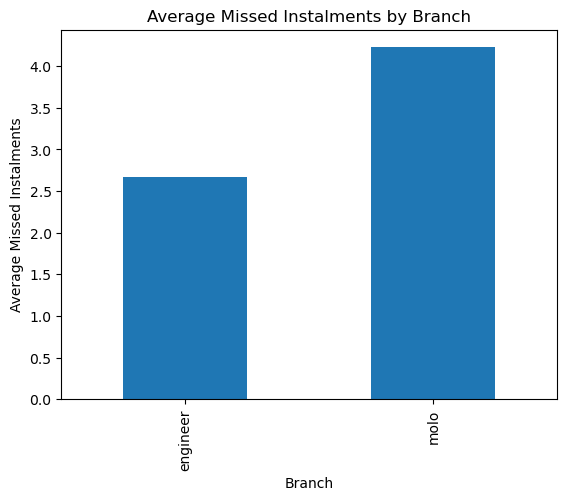

In [ ]:
# Average Missed Installments by Branch
average_misinstalments_by_branch = df.groupby('Branch')['MissedInstalments'].mean()
average_misinstalments_by_branch.plot(kind='bar')

plt.xlabel('Branch')
plt.ylabel('Average Missed Instalments')
plt.title('Average Missed Instalments by Branch')

plt.show()

## **Hypothesis 05.** 
##### Frequent client has higher risk to default

**Conclusion**: Frequent borrowers represent a lower-risk segment, contradicting the initial hypothesis and highlighting the importance of borrower history in credit risk assessment.

In [65]:
# Get the customer loan counts based on CustomerId and plot as a histogram
customer_loan_counts = df['CustomerId'].value_counts()

# Get the number of customers with 1 loan
single_loan_customers = customer_loan_counts[customer_loan_counts == 1].count()

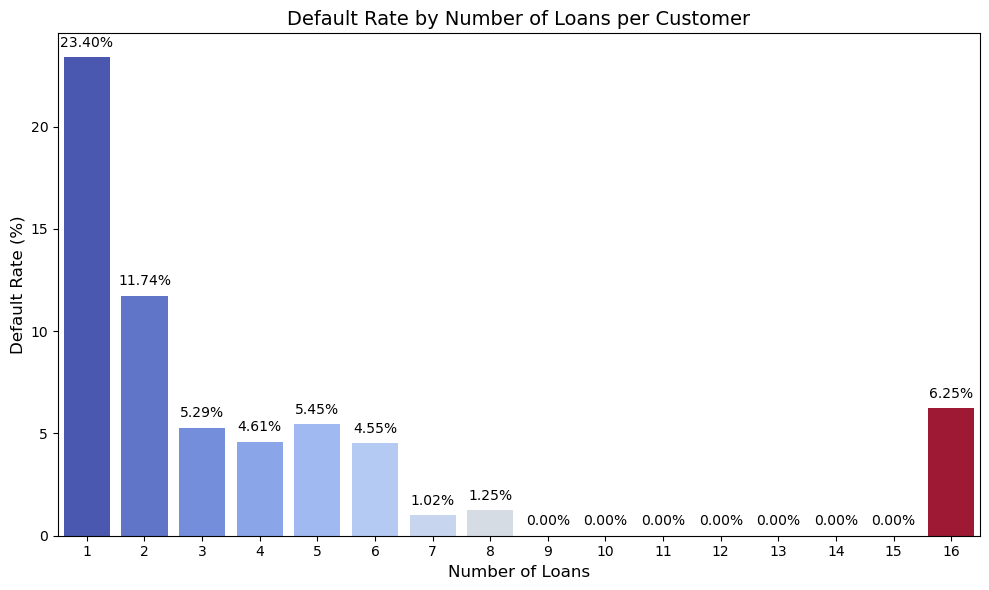

In [66]:
# Visualize the default rate based on the number of loans per customer as a bar plot
loan_count_defaults = df.groupby(df['CustomerId'].map(customer_loan_counts))['IsDefault'].mean().reset_index()
loan_count_defaults.columns = ['Number of Loans', 'Default Rate']
loan_count_defaults['Default Rate'] *= 100  
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Number of Loans', 
    y='Default Rate', 
    data=loan_count_defaults, 
    palette='coolwarm',hue = 'Number of Loans', legend=False)

plt.title('Default Rate by Number of Loans per Customer', fontsize=14)
plt.xlabel('Number of Loans', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)

# Add the actual percentage text above each bar
for index, value in enumerate(loan_count_defaults['Default Rate']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

## **Hypothesis 06.** 
##### If client makes miss instalment or transaction frequently, they have high possibility to make default micro finance.

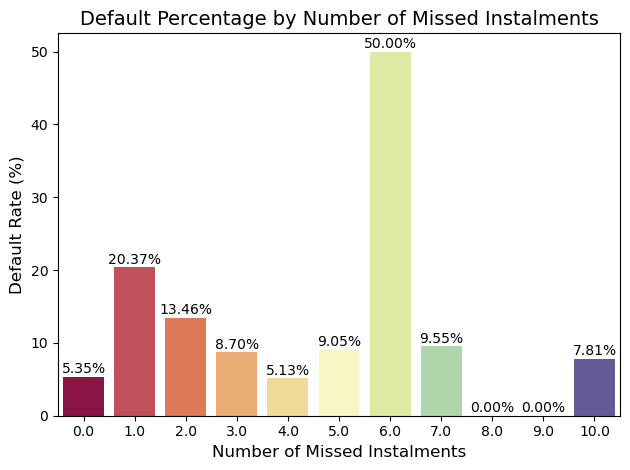

In [67]:
# Visualize the relationship between MissedInstalments and IsDefault using a bar plot
missed_instalment_defaults = df.groupby('MissedInstalments')['IsDefault'].mean().reset_index()
missed_instalment_defaults['Default Percentage'] = missed_instalment_defaults['IsDefault'] * 100
sns.barplot(
    x='MissedInstalments', 
    y='Default Percentage', 
    data=missed_instalment_defaults, 
    palette='Spectral', hue = 'MissedInstalments', legend=False)


plt.title('Default Percentage by Number of Missed Instalments', fontsize=14)
plt.xlabel('Number of Missed Instalments', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
# Add the actual percentage text above each bar
for index, value in enumerate(missed_instalment_defaults['Default Percentage']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

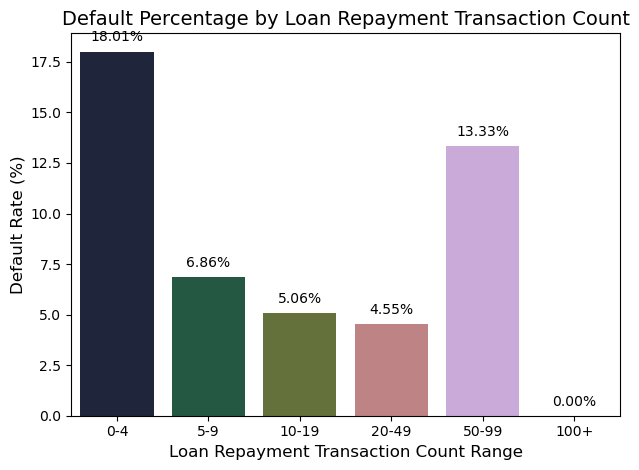

In [ ]:
# Visualize the loan_repayment_txn_count against IsDefault using a bar plot in buckets
# Define bins and labels for loan repayment transaction counts
bins = [0, 5, 10, 20, 50, 100, 500]
labels = ['0-4', '5-9', '10-19', '20-49', '50-99', '100+']

# Create a new column for binned loan repayment transaction counts
df['LoanRepaymentTxnCountBin'] = pd.cut(df['loan_repayment_txn_count'], bins=bins, labels=labels, right=False)          
loan_repayment_defaults = df.groupby('LoanRepaymentTxnCountBin', observed=False)['IsDefault'].mean().reset_index()
loan_repayment_defaults['Default Percentage'] = loan_repayment_defaults['IsDefault'] * 100
sns.barplot(
    x='LoanRepaymentTxnCountBin', 
    y='Default Percentage', 
    data=loan_repayment_defaults, 
    palette='cubehelix', 
    hue = 'LoanRepaymentTxnCountBin', 
    legend=False
)
plt.title('Default Percentage by Loan Repayment Transaction Count', fontsize=14)
plt.xlabel('Loan Repayment Transaction Count Range', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)

# Add the actual percentage text above each bar
for index, value in enumerate(loan_repayment_defaults['Default Percentage']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# **Hypothesis 07.** 
##### Does a client's previous loan history significantly affect their likelihood of default? 

**Conclusion**: Clients who fully cleared their previous loans show a higher default rate than those who had 1–5 missed installments.

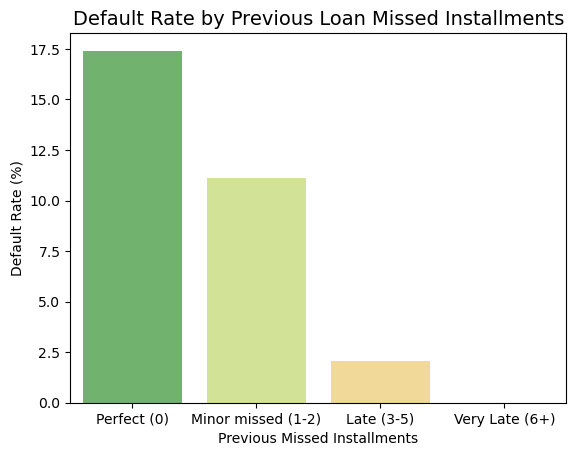

In [ ]:
# Sort by Customer and Date to ensure correct order
df = df.sort_values(by=['CustomerId', 'BorrowDate'])

# All loans are at least cycle 2 (the first loan is cycle 1, which we have removed during preprocessing)
# Calculate Loan Cycle (Cycle 2, 3, etc.)
df['Loan_Sequence'] = df.groupby('CustomerId').cumcount() + 2

# Look at the PREVIOUS loan's behavior for each customer
df['Prev_MissedInstalments'] = df.groupby('CustomerId')['MissedInstalments'].shift(1)
df['Prev_TxnCount'] = df.groupby('CustomerId')['loan_repayment_txn_count'].shift(1)

# We remove the first loan for each customer because they have no history to analyze
history_df = df.dropna(subset=['Prev_MissedInstalments', 'Prev_TxnCount']).copy()

# Visualize the relationship between previous missed installments and current default rate

# Bin the missed installments into groups
# Groups of bins (perfect - no missed, minor missed, late, very late)
history_df['History_Group'] = pd.cut(history_df['Prev_MissedInstalments'], 
                                     bins=[-1, 0, 2, 5, 100], 
                                     labels=['Perfect (0)', 'Minor missed (1-2)', 'Late (3-5)', 'Very Late (6+)'])

# Calculate Default Rate per group
default_rates = history_df.groupby('History_Group', observed=False)['IsDefault'].mean() * 100

# Plot
sns.barplot(x=default_rates.index, y=default_rates.values, palette='RdYlGn_r', hue = default_rates.index, legend=False) # Red to Green color map
plt.title('Default Rate by Previous Loan Missed Installments', fontsize=14)
plt.ylabel('Default Rate (%)')
plt.xlabel('Previous Missed Installments')
plt.show()

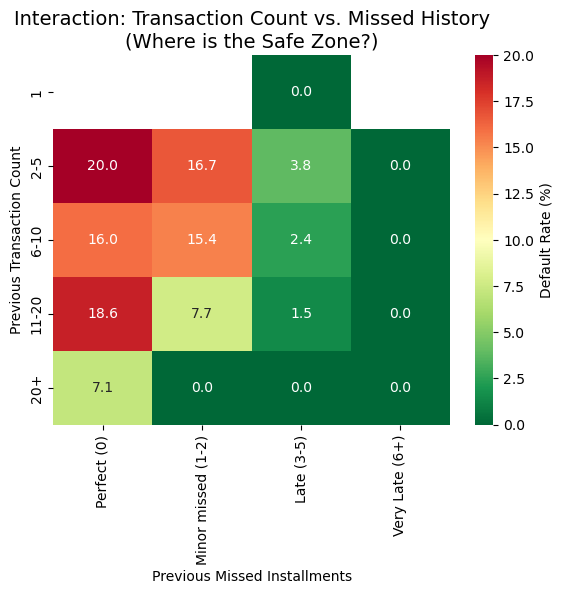

In [70]:
# Interaction: Transaction Count vs. Missed History Heatmap

# Bin Transaction Counts
history_df['Txn_Group'] = pd.cut(history_df['Prev_TxnCount'], 
                                 bins=[0, 1, 5, 10, 20, 100], 
                                 labels=['1', '2-5', '6-10', '11-20', '20+'])

# Create Pivot Table
pivot_table = history_df.pivot_table(index='Txn_Group', columns='History_Group', values='IsDefault', aggfunc='mean', observed=False) * 100

# Plot Heatmap
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='RdYlGn_r', cbar_kws={'label': 'Default Rate (%)'})
plt.title('Interaction: Transaction Count vs. Missed History\n(Where is the Safe Zone?)', fontsize=14)
plt.ylabel('Previous Transaction Count')
plt.xlabel('Previous Missed Installments')
plt.show()

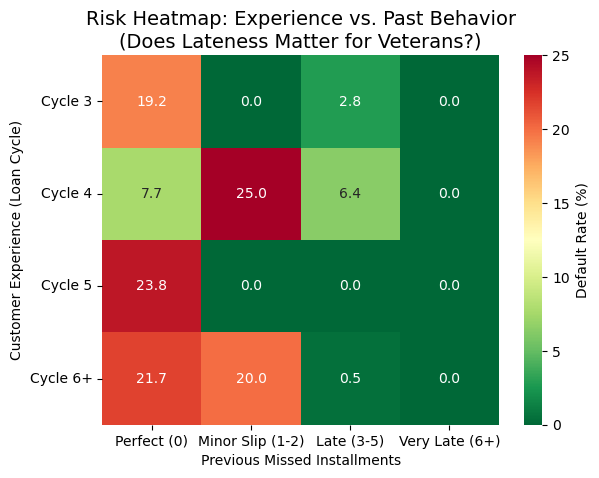

In [ ]:
# Experience: Loan Cycle vs. Missed History Heatmap

# Create Bins
# Behavior Bins
history_df['History_Group'] = pd.cut(history_df['Prev_MissedInstalments'], 
                                     bins=[-1, 0, 2, 5, 100], 
                                     labels=['Perfect (0)', 'Minor Slip (1-2)', 'Late (3-5)', 'Very Late (6+)'])

# Experience Bins (Loan Cycles)
history_df['Experience_Group'] = pd.cut(history_df['Loan_Sequence'], 
                                      bins=[1.9, 2.9, 3.9, 4.9, 5.9, 100], 
                                      labels=['Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5', 'Cycle 6+'])

# Create Heatmap
pivot_table = history_df.pivot_table(index='Experience_Group', columns='History_Group', values='IsDefault', aggfunc='mean', observed = False) * 100

sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='RdYlGn_r', cbar_kws={'label': 'Default Rate (%)'})
plt.title('Risk Heatmap: Experience vs. Past Behavior\n(Does Lateness Matter for Veterans?)', fontsize=14)
plt.ylabel('Customer Experience (Loan Cycle)')
plt.xlabel('Previous Missed Installments')
plt.yticks(rotation=0)
plt.show()

## **Hypothesis 8**
##### Does business type impact to make default?

**Conclusion** 
1. Top 25% clients who has high credit score but has many missed instalments tend to borrow big amount of loan than others customers.
2. Agriculture, green grocery business owener has higher risk to make defaulty (but cannot generalized)

High credit score but missed instalments clients: 503


C:\Users\kunal\AppData\Local\Temp\ipykernel_2816\2338228965.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_risk_prime, y='BusinessType',


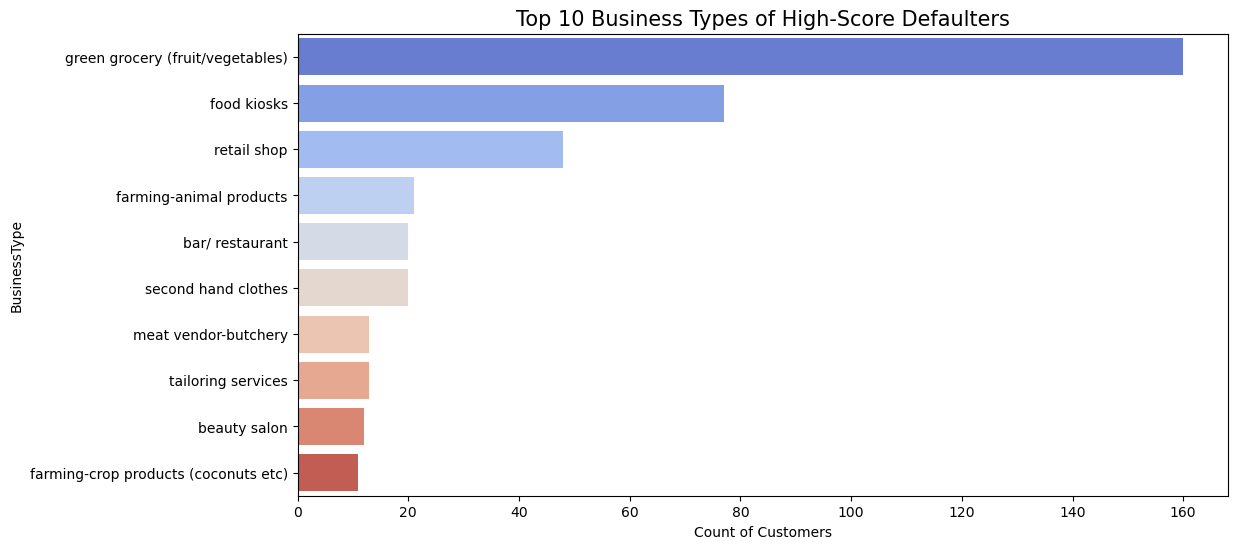

In [ ]:
# High Credit Score but High Missed Instalments Analysis
high_score_threshold = df['CreditScore'].quantile(0.75)  # Top 25% credit score
high_missed_threshold = df['MissedInstalments'].mean()   # Average missed instalments

high_risk_prime = df[(df['CreditScore'] >= high_score_threshold) & 
                     (df['MissedInstalments'] > high_missed_threshold)].copy()

print(f"High credit score but missed instalments clients: {len(high_risk_prime)}")

# Visualization their business types
plt.figure(figsize=(12, 6))
sns.countplot(data=high_risk_prime, y='BusinessType', 
              order=high_risk_prime['BusinessType'].value_counts().iloc[:10].index, 
              palette='coolwarm')

plt.title('Top 10 Business Types of High-Score Defaulters', fontsize=15)
plt.xlabel('Count of Customers')
plt.show()

In [ ]:
# Industry Types by Default Rate 
# Group by Industry to get total and default counts
industry_analysis = df.groupby("Industry").agg(
    Total_Clients=("LoanId", "count"),
    Default_Clients=("Default", "sum")
    ).reset_index()

# Calculate Default Rate (%)
industry_analysis["Default_Rate_%"] = (
    industry_analysis["Default_Clients"] / industry_analysis["Total_Clients"]) * 100

# Sort by number of defaults
industry_analysis = industry_analysis.sort_values(
    by="Default_Clients", ascending=False)

# Visualize top 10 Industries with most defaulters
plt.figure(figsize=(12, 8))
sns.barplot(
    data=industry_analysis.head(10),
    x="Default_Clients",
    y="Industry",
    palette="magma", 
    hue = "Industry", legend=False
)

# Add value labels
for i, val in enumerate(industry_analysis.head(10)["Default_Clients"]):
    plt.text(val + 1, i, f"{int(val)} cases", va="center", fontweight="bold")

plt.title("Top 10 Industries with Highest Number of Default Clients", fontsize=15)
plt.xlabel("Number of Default Clients")
plt.ylabel("Industry")
plt.show()


KeyError: "Column(s) ['Default'] do not exist"

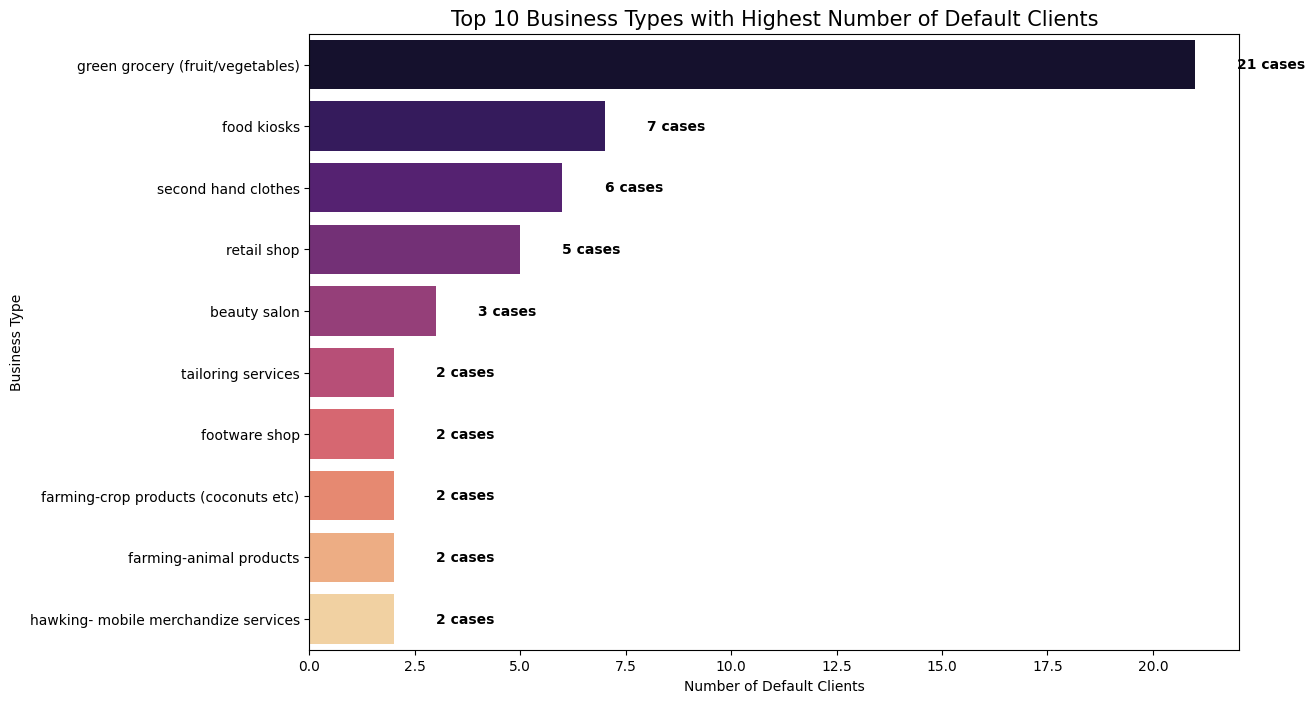

In [ ]:
# Assuming 'Default' column is already created by your teammate
# If not, we use the logic: (df['ClearDate'] > '2025-12-15') & (df['LoanBalance'] > 0)
if 'Default' not in df.columns:
    df['Default'] = ((df['ClearDate'] > '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)

# Group by BusinessType to get total and default counts
business_analysis = df.groupby('BusinessType').agg(
    Total_Clients=('LoanId', 'count'),
    Default_Clients=('Default', 'sum')
).reset_index()

# Calculate Default Rate (%) for better context
business_analysis['Default_Rate_%'] = (business_analysis['Default_Clients'] / business_analysis['Total_Clients']) * 100
business_analysis = business_analysis.sort_values(by='Default_Clients', ascending=False)

# Visualize the top 10 Business Types with most Defaulters
plt.figure(figsize=(12, 8))
sns.barplot(data=business_analysis.head(10), x='Default_Clients', y='BusinessType', palette='magma', hue = 'BusinessType', legend=False)

# Add value labels
for i, val in enumerate(business_analysis.head(10)['Default_Clients']):
    plt.text(val + 1, i, f'{int(val)} cases', va='center', fontweight='bold')

plt.title('Top 10 Business Types with Highest Number of Default Clients', fontsize=15)
plt.xlabel('Number of Default Clients')
plt.ylabel('Business Type')
plt.show()

## Hypothesis 9.

##### Clients With Higher Loan Balance Are More Likely to Default

**Conclusion:** If defaulters have higher remaining balances, the hypothesis is supported. If balances are similar, loan balance may not be a strong predictor.

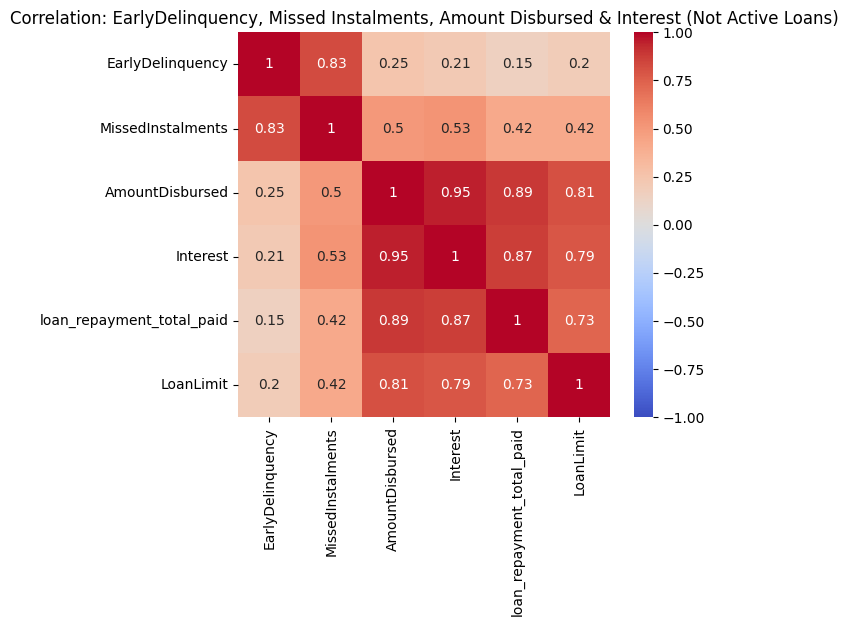

In [ ]:
# Correlation for not active loans on highly correlated features 
cutoff = pd.to_datetime("2025-12-15")
df_not_active = df[df['ClearDate'] < cutoff]
df_not_active = df[df['ClearDate'] < cutoff].copy()

df_not_active.loc[:, 'EarlyDelinquency'] = (df_not_active['MissedInstalments'] > 0).astype(int)
# should change the name of DefaultRate --> EarlyDelinquency / DelinquencyFlag

corr_features = df_not_active[['EarlyDelinquency', 'MissedInstalments', 'AmountDisbursed', 'Interest', 'loan_repayment_total_paid', 'LoanLimit']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_features, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: EarlyDelinquency, Missed Instalments, Amount Disbursed & Interest (Not Active Loans)")
plt.show()

# Feature Engineering

In [ ]:
# 1. Risk profile by Branch & Business type - High correlation to default (0.33 correlation rate)

df['IsDefault'] = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)
branch_biz_risk = df.groupby(['Branch', 'BusinessType'])['IsDefault'].transform('mean')
df['Branch_Biz_Risk_Score'] = branch_biz_risk

# 2. Rate of loan utilized against the limit - Moderate correlation to default (0.13 correlation rate), good to predict how much client borrow verse their Loan limit
df['Loan_Utilization'] = df['AmountDisbursed'] / df['LoanLimit']

# 3. Gender & Branch - Use Binary Encoding (0 or 1) - AI models only read numbers. Encoding converts words into digits for mathematical processing
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})
df['Branch'] = df['Branch'].map({'engineer': 1, 'molo': 0})

# 4. BusinessType - Use Frequency Encoding - To simplify complexity. ( 50 different business types can be kept in one single column). Also, It captures business prevalence, helping AI link a sector's market density to its specific risk.
business_type_freq = df['BusinessType'].value_counts(normalize=True)
df['BusinessType'] = df['BusinessType'].map(business_type_freq)

# 5. Repayment engagement -  How actively a customer is repaying their loan over time. Tells us who is paying regularly vs. dragging payments (3 payments in 10 days and 3 payments in 60 days)
df["Txn_Intensity"] = df["loan_repayment_txn_count"] / (df["RepaymentDuration"] + 1)

# 6. Missed Rate - How unreliable a customer is relative to how often they repay.
df["Missed_Rate"] = df["MissedInstalments"] / (df["loan_repayment_txn_count"] + 1)

# 7. Repayment coverage - How much of the disbursed loan has been repaid so far.
df["Repayment_Coverage"] = df["loan_repayment_total_paid"]/(df["AmountDisbursed"] + 1)

# 8. Loan term  - Actual loan duration
df['loan_term_days'] = (df['ClearDate'] - df['BorrowDate']).dt.days

# 9. Balance ratios - Remaining balance vs limit and Remaining balance vs principal
df['balance_to_limit'] = df['LoanBalance'] / df['LoanLimit'].replace(0, np.nan)
df['balance_to_disbursed'] = df['LoanBalance'] / df['AmountDisbursed'].replace(0, np.nan)

# 10. Overpayment ratio - Extra payments
df['overpayment_ratio'] = df['loan_overpayment'] / df['AmountDisbursed'].replace(0, np.nan)

# 11. Seasonality - Month of borrowing (Is December riskier?) - Check if there is any correlation between month of loan taken and ultimate loan default
df['BorrowMonth'] = df['BorrowDate'].dt.month

# 12. Sequence: 1st loan, 2nd loan, etc - Feel free to add extra features or structure
df['Loan_Sequence'] = df.groupby('CustomerId').cumcount() + 1

# 13. Previous Missed Payments - Feel free to add extra features or structure
df['Prev_MissedInstalments'] = df.groupby('CustomerId')['MissedInstalments'].shift(1)

# 14. Experienced delinquent customers" Indicator: High Experience and History of Missed Payments
# (Sequence > 5) AND (Prev_Missed > 0)
df['experienced_delinquent'] = ((df['Loan_Sequence'] > 5) & (df['Prev_MissedInstalments'] > 0)).astype(int)

# 15. Financial stress (After how many missed installments is the customer a potential risk?) - The heat map shows low relevance as it is behavioral feature (depends on a threshold value). However, in real world afer missing a certain number of repayments the customer should be listed as risky.
df['Financial_Stress'] = (df['MissedInstalments'] > 3).astype(int)


df.head(10)


,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,days_to_first,Product_Code,Branch_Code,ScoreRange,IsDefault,LoanAmountBin,LoanRepaymentTxnCountBin,Loan_Sequence,Prev_MissedInstalments,Prev_TxnCount,RepaymentDuration,Default,Branch_Biz_Risk_Score,Loan_Utilization,Txn_Intensity,Missed_Rate,Repayment_Coverage,loan_term_days,balance_to_limit,balance_to_disbursed,overpayment_ratio,BorrowMonth,experienced_delinquent,Financial_Stress
2576,646265,10000,2750,0.0,2024-02-13,5 weeks credit ease,0,2024-12-02,23,1,17500.0,1800,13,12750,2025-04-30,2025-08-20,0,5.0,natural resources/environmental,0.023003,2022,442,1,1,2k,0,10k-15k,10-19,1,NaN,NaN,293,0,0.033333,0.571429,0.044218,0.357143,1.274873,293,0.0,0.0,0.0,2,0,1
124,720868,10000,3850,0.0,2024-05-09,7 weeks credit ease,0,2024-05-09,23,1,10000.0,2000,1,264,2025-08-20,2025-08-20,0,7.0,food & hospitality,0.314377,2012,468,2,1,2.5k,0,10k-15k,0-4,2,5.0,13.0,0,0,0.051075,1.000000,1.000000,3.500000,0.026397,0,0.0,0.0,0.0,5,0,1
521,650669,6000,1750,0.0,2024-02-19,5 weeks credit ease,0,2024-02-22,90,1,15000.0,2000,4,7750,2025-08-25,2025-09-09,0,5.0,food & hospitality,0.314377,2019,553,1,1,2.5k,0,5k-10k,0-4,1,NaN,NaN,3,0,0.051075,0.400000,1.000000,1.000000,1.291451,3,0.0,0.0,0.0,2,0,1
2005,705587,5000,1500,0.0,2024-07-16,5 weeks credit ease,0,2024-07-16,90,1,7900.0,2000,9,6500,2025-09-20,2025-10-09,0,5.0,fashion & beauty products,0.046006,2019,431,1,1,2.5k,0,5k-10k,5-9,2,5.0,4.0,0,0,0.040000,0.632911,9.000000,0.500000,1.299740,0,0.0,0.0,0.0,7,0,1
2192,720456,10000,2750,0.0,2024-08-20,5 weeks credit ease,0,2024-08-21,90,1,11400.0,2500,10,12750,2025-10-09,2025-11-17,0,5.0,fashion & beauty products,0.046006,2019,415,1,1,3k,0,10k-15k,10-19,3,5.0,9.0,1,0,0.040000,0.877193,5.000000,0.454545,1.274873,1,0.0,0.0,0.0,8,0,1
231,768510,10000,2750,0.0,2024-09-12,5 weeks credit ease,0,2024-12-16,90,1,20000.0,2000,2,2573,2025-11-17,2025-11-25,0,5.0,food & hospitality,0.314377,2018,431,1,1,2.5k,0,10k-15k,0-4,4,5.0,10.0,95,0,0.051075,0.500000,0.020833,1.666667,0.257274,95,0.0,0.0,0.0,9,0,1
344,892199,4000,1250,0.0,2025-09-17,5 weeks credit ease,0,2025-09-23,156,0,8000.0,2000,3,3700,2025-10-03,2025-10-22,0,5.0,hospitality & tourism,0.005751,2019,16,1,1,2.5k,0,0-5k,0-4,1,NaN,NaN,6,0,0.000000,0.500000,0.428571,1.250000,0.924769,6,0.0,0.0,0.0,9,0,1
2338,657768,5000,1500,0.0,2024-09-03,5 weeks credit ease,0,2024-12-03,180,1,7100.0,2500,11,6500,2025-06-12,2025-07-11,0,5.0,agriculture,0.314377,2013,282,1,1,3k,0,5k-10k,10-19,1,NaN,NaN,91,0,0.051075,0.704225,0.119565,0.416667,1.299740,91,0.0,0.0,0.0,9,0,1
2575,836666,5000,1500,0.0,2025-04-06,5 weeks credit ease,0,2025-10-06,180,0,6700.0,2000,13,4471,2025-08-06,2025-09-05,0,5.0,food & hospitality,0.314377,2019,122,1,1,2.5k,0,5k-10k,10-19,2,5.0,11.0,183,0,0.051075,0.746269,0.070652,0.357143,0.894021,183,0.0,0.0,0.0,4,0,1
1523,641972,15000,8000,0.0,2024-02-20,10 weeks credit ease,0,2024-06-03,295,0,33000.0,7000,7,23000,2024-05-28,2024-06-25,0,10.0,agriculture,0.037061,2013,98,0,1,7.5k,0,15k-20k,5-9,1,NaN,NaN,104,0,0.043478,0.454545,0.066667,1.250000,1.533231,104,0.0,0.0,0.0,2,0,1


In [ ]:
for col in df.columns:
    print(col)


LoanId
AmountDisbursed
Interest
LoanBalance
BorrowDate
Product
Branch
ClearDate
CustomerId
Gender
LoanLimit
CreditScore
loan_repayment_txn_count
loan_repayment_total_paid
loan_repayment_first_payment
loan_repayment_last_payment
loan_overpayment
MissedInstalments
Industry
BusinessType
YearEstablished
days_to_first
Product_Code
Branch_Code
ScoreRange
IsDefault
LoanAmountBin
LoanRepaymentTxnCountBin
Loan_Sequence
Prev_MissedInstalments
Prev_TxnCount
RepaymentDuration
Default
Branch_Biz_Risk_Score
Loan_Utilization
Txn_Intensity
Missed_Rate
Repayment_Coverage
loan_term_days
balance_to_limit
balance_to_disbursed
overpayment_ratio
BorrowMonth
experienced_delinquent
Financial_Stress


In [ ]:
CUTOFF_DATE = pd.Timestamp("2025-12-15")

In [ ]:
# More feature engineering
# 16. Calculate days since disbursement and remaining contract days
df["days_since_disbursement"] = (CUTOFF_DATE - df["BorrowDate"]).dt.days
df["remaining_contract_days"] = df["loan_term_days"] - df["days_since_disbursement"]

df["remaining_contract_ratio"] = (
    df["remaining_contract_days"] / df["loan_term_days"]
).clip(lower=0)

In [ ]:
# 17. Calculate growth in loan amount compared to first loan amount
df["first_loan_amount"] = (
    df.groupby("CustomerId")["AmountDisbursed"].transform("first")
)

df["loan_growth_from_first"] = (
    df["AmountDisbursed"] / df["first_loan_amount"]
)


In [ ]:
# 18. Log-transform Loan Sequence to reduce skewness

df["log_loan_experience"] = np.log1p(df["Loan_Sequence"])


In [ ]:
# 19. Calculate business age at the time of borrowing

df["business_age"] = df["BorrowDate"].dt.year - df["YearEstablished"]
df["business_age"] = df["business_age"].clip(lower=0)


# Data Selection for Modeling

In [ ]:
# Variables to be used for modeling
TARGET = "IsDefault"          
DATE_COL = "BorrowDate"       
CUTOFF_EXCLUDE = "2025-12-01" 

# Numerical features
NUM_FEATURES = [
    "AmountDisbursed",
    "Interest",
    "LoanLimit",
    "loan_term_days",
    "days_since_disbursement",
    "remaining_contract_days",
    "remaining_contract_ratio",
    "Loan_Sequence",
    "log_loan_experience",
    "first_loan_amount",
    "loan_growth_from_first",
    "business_age",
    "Loan_Utilization"
]

# Categorical features
CAT_FEATURES = [
    "Product_Code",
    "Branch_Code",
    "Gender",
    "Industry",
    "BusinessType",
    "BorrowMonth",
]

# Dropping Leakage Features
DROP_ALWAYS = [
    # identifiers
    "LoanId", "CustomerId",

    # target duplicates
    "Default",

    # direct leakage 
    "LoanBalance", "ClearDate",
    "balance_to_limit", "balance_to_disbursed",
    "Financial_Stress",

    # repayment behaviour 
    "loan_repayment_txn_count", "loan_repayment_total_paid",
    "loan_repayment_first_payment", "loan_repayment_last_payment",
    "loan_overpayment", "overpayment_ratio",
    "MissedInstalments", "days_to_first",
    "LoanRepaymentTxnCountBin", "RepaymentDuration",
    "Prev_MissedInstalments", "Prev_TxnCount",
    "Txn_Intensity", "Missed_Rate", "Repayment_Coverage",
    "experienced_delinquent",

    # text duplicates 
    "Product", "Branch",

    # engineered leakage
    "Branch_Biz_Risk_Score",
    "ScoreRange",
]

# keep only those that exist
# Keep only columns that exist
DROP_ALWAYS = [c for c in DROP_ALWAYS if c in df.columns]

# model dataframe building
df_model = df.copy()

# Ensure BorrowDate is datetime (needed later for time split)
df_model[DATE_COL] = pd.to_datetime(df_model[DATE_COL], errors="coerce")

# Drop rows missing date or target
df_model = df_model.dropna(subset=[DATE_COL, TARGET]).copy()

# Remove leaky columns first (safety)
df_model = df_model.drop(columns=DROP_ALWAYS, errors="ignore")

# Keep only approved features that exist + date + target
NUM_FEATURES = [c for c in NUM_FEATURES if c in df_model.columns]
CAT_FEATURES = [c for c in CAT_FEATURES if c in df_model.columns]
FEATURES = NUM_FEATURES + CAT_FEATURES

keep_cols = [DATE_COL, TARGET] + FEATURES
df_model = df_model[keep_cols].copy()

# Final x/y ready (but not split yet)
X = df_model[FEATURES].copy()
y = df_model[TARGET].astype(int).copy()

print("Finalised feature count:", len(FEATURES))
print("X shape:", X.shape, "| y default rate:", y.mean().round(4))
print("\nNumeric features:", NUM_FEATURES)
print("Categorical features:", CAT_FEATURES)




Finalised feature count: 19
X shape: (1565, 19) | y default rate: 0.085

Numeric features: ['AmountDisbursed', 'Interest', 'LoanLimit', 'loan_term_days', 'days_since_disbursement', 'remaining_contract_days', 'remaining_contract_ratio', 'Loan_Sequence', 'log_loan_experience', 'first_loan_amount', 'loan_growth_from_first', 'business_age', 'Loan_Utilization']
Categorical features: ['Product_Code', 'Branch_Code', 'Gender', 'Industry', 'BusinessType', 'BorrowMonth']


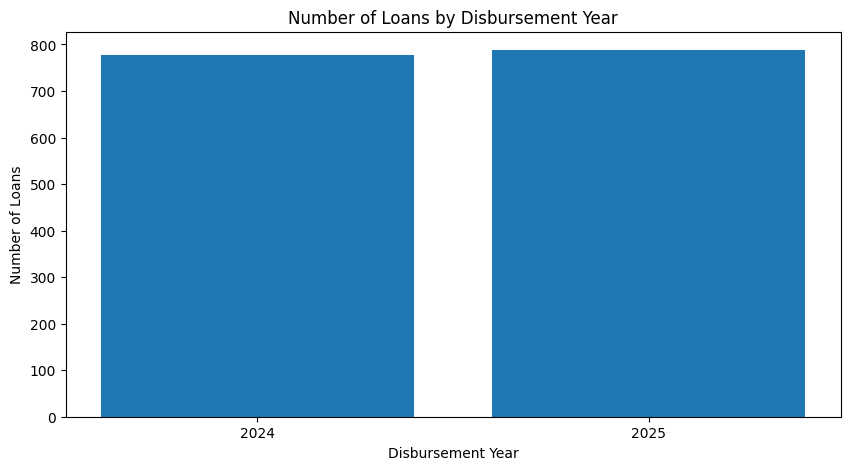

BorrowDate
2024    777
2025    788
Name: count, dtype: int64


In [ ]:
DATE_COL = "BorrowDate"

# Ensure datetime
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")

# Count loans by year
loans_by_year = (
    df.dropna(subset=[DATE_COL])[DATE_COL]
      .dt.year
      .value_counts()
      .sort_index()
)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(loans_by_year.index.astype(str), loans_by_year.values)
plt.title("Number of Loans by Disbursement Year")
plt.xlabel("Disbursement Year")
plt.ylabel("Number of Loans")
plt.xticks(rotation=0)
plt.show()

print(loans_by_year)

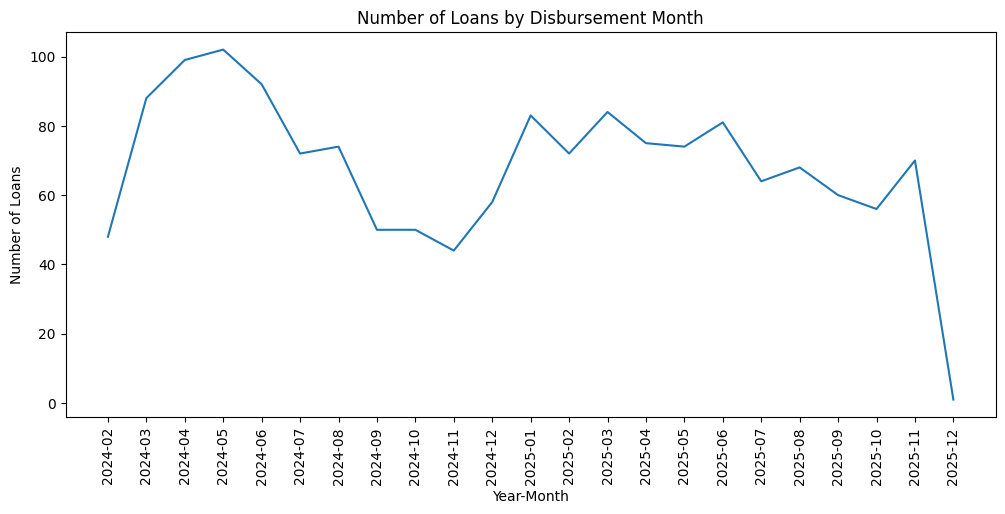

In [ ]:
by_month = (
    df.dropna(subset=[DATE_COL])[DATE_COL]
      .dt.to_period("M")
      .value_counts()
      .sort_index()
)

plt.figure(figsize=(12, 5))
plt.plot(by_month.index.astype(str), by_month.values)
plt.title("Number of Loans by Disbursement Month")
plt.xlabel("Year-Month")
plt.ylabel("Number of Loans")
plt.xticks(rotation=90)
plt.show()

#print(by_month.tail(24))

### Splitting by Date

#### Training: 
Feb 2024 to Feb 2025 (~65%)

#### Validation: 
Mar 2025 to May 2025 (~15%)

#### Testing:
Jun 2025 to Nov 2025 (~20%)

In [ ]:
# Exclude incomplete last month (Dec 2025)
df = df[df["BorrowDate"] < "2025-12-01"].copy()

# Option B splits
train_df = df[df["BorrowDate"] < "2025-03-01"].copy()  # up to end of Feb 2025
val_df   = df[(df["BorrowDate"] >= "2025-03-01") & (df["BorrowDate"] < "2025-06-01")].copy()
test_df  = df[(df["BorrowDate"] >= "2025-06-01") & (df["BorrowDate"] < "2025-12-01")].copy()

print("Train:", train_df.shape, " | months:", train_df["BorrowDate"].dt.to_period("M").nunique())
print("Val:  ", val_df.shape,   " | months:", val_df["BorrowDate"].dt.to_period("M").nunique())
print("Test: ", test_df.shape,  " | months:", test_df["BorrowDate"].dt.to_period("M").nunique())

# If you've already built X (features) and y (target) earlier:
X_train, y_train = train_df[X.columns], train_df[y.name]
X_val, y_val     = val_df[X.columns],   val_df[y.name]
X_test, y_test   = test_df[X.columns],  test_df[y.name]

print("Default rates ->",
      "train:", y_train.mean().round(4),
      "val:", y_val.mean().round(4),
      "testa:", y_test.mean().round(4))

Train: (932, 52)  | months: 13
Val:   (233, 52)  | months: 3
Test:  (399, 52)  | months: 6
Default rates -> train: 0.0612 val: 0.1159 testa: 0.1228


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, NUM_FEATURES),
        ("cat", categorical_transformer, CAT_FEATURES)
    ]
)

In [ ]:
# Naive Baseline Model: Predict Majority Class (No Default)

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report

log_model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(
        max_iter=2000,
        random_state=42
    ))
])

log_model.fit(X_train, y_train)

val_proba = log_model.predict_proba(X_val)[:, 1]
print("Logistic VAL ROC-AUC:", roc_auc_score(y_val, val_proba))

val_pred = (val_proba >= 0.5).astype(int)
print(classification_report(y_val, val_pred))

Logistic VAL ROC-AUC: 0.811938151743977
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       206
           1       0.64      0.26      0.37        27

    accuracy                           0.90       233
   macro avg       0.77      0.62      0.66       233
weighted avg       0.88      0.90      0.88       233



In [ ]:
# Balanced Class Model: Adjust for Class Imbalance

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report

log_model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

log_model.fit(X_train, y_train)

val_proba = log_model.predict_proba(X_val)[:, 1]
print("Logistic VAL ROC-AUC:", roc_auc_score(y_val, val_proba))

val_pred = (val_proba >= 0.5).astype(int)
print(classification_report(y_val, val_pred))

Logistic VAL ROC-AUC: 0.8160733549083063
              precision    recall  f1-score   support

           0       0.97      0.44      0.60       206
           1       0.17      0.89      0.29        27

    accuracy                           0.49       233
   macro avg       0.57      0.66      0.44       233
weighted avg       0.88      0.49      0.57       233



In [ ]:
# Model retraining with adjusted hyperparameters

for C in [1.0, 0.5, 0.2, 0.1, 0.05, 0.01]:
    model = Pipeline(steps=[
        ("prep", preprocess),
        ("clf", LogisticRegression(
            max_iter=5000,
            class_weight="balanced",
            # Regularization process
            C=C,
            solver="liblinear",
            random_state=42
        ))
    ])
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, proba)
    print(f"C={C:<5}  VAL ROC-AUC={auc:.4f}")

C=1.0    VAL ROC-AUC=0.8146
C=0.5    VAL ROC-AUC=0.8182
C=0.2    VAL ROC-AUC=0.8225
C=0.1    VAL ROC-AUC=0.8287
C=0.05   VAL ROC-AUC=0.8330
C=0.01   VAL ROC-AUC=0.8384


In [ ]:
# Selected logistic regression model with C=0.01

log_model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        C=0.01,
        solver="liblinear",
        random_state=42
    ))
])

log_model.fit(X_train, y_train)
val_proba = log_model.predict_proba(X_val)[:, 1]
print("Logistic VAL ROC-AUC:", roc_auc_score(y_val, val_proba))

val_pred = (val_proba >= 0.5).astype(int)
print(classification_report(y_val, val_pred))

Logistic VAL ROC-AUC: 0.8383674937072996
              precision    recall  f1-score   support

           0       0.97      0.55      0.71       206
           1       0.21      0.89      0.34        27

    accuracy                           0.59       233
   macro avg       0.59      0.72      0.52       233
weighted avg       0.89      0.59      0.66       233



In [ ]:
from sklearn.metrics import precision_recall_curve

val_proba = log_model.predict_proba(X_val)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_val, val_proba)

pr_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1],
})

# pick recall-prioritised operating point
pr_df[(pr_df["recall"] >= 0.65) & (pr_df["recall"] <= 0.80)] \
    .sort_values("precision", ascending=False) \
    .head(10)


,threshold,precision,recall
190,0.739656,0.418605,0.666667
189,0.739215,0.409091,0.666667
188,0.736000,0.400000,0.666667
185,0.722083,0.395833,0.703704
187,0.735793,0.391304,0.666667
184,0.714976,0.387755,0.703704
186,0.725798,0.382979,0.666667
183,0.714954,0.380000,0.703704
182,0.714192,0.372549,0.703704
181,0.713867,0.365385,0.703704


In [ ]:
# Model testing Logistic Regression with chosen threshold

CHOSEN_THRESHOLD = 0.74

test_proba = log_model.predict_proba(X_test)[:, 1]

test_pred = (test_proba >= CHOSEN_THRESHOLD).astype(int)

from sklearn.metrics import roc_auc_score, classification_report
print("TEST ROC–AUC:", roc_auc_score(y_test, test_proba))
print(classification_report(y_test, test_pred))


TEST ROC–AUC: 0.6271720116618076
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       350
           1       0.18      0.41      0.25        49

    accuracy                           0.70       399
   macro avg       0.54      0.58      0.53       399
weighted avg       0.81      0.70      0.75       399



In [ ]:
# Using HistGradientBoostingClassifier

import numpy as np
import pandas as pd
from sklearn.metrics import (
    roc_auc_score, classification_report, precision_recall_curve
)

# --- 1) Fit  ---
gb_model.fit(X_train, y_train)

# --- 2) VALIDATION: ROC-AUC + threshold search (choose threshold on VAL) ---
val_proba_gb = gb_model.predict_proba(X_val)[:, 1]
print("GB VAL ROC–AUC:", roc_auc_score(y_val, val_proba_gb))

precision, recall, thresholds = precision_recall_curve(y_val, val_proba_gb)

pr_df_gb = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1],
})

# show best precision among reasonable recall band (same as did for logistic)
cand = (pr_df_gb[(pr_df_gb["recall"] >= 0.65) & (pr_df_gb["recall"] <= 0.80)]
        .sort_values("precision", ascending=False))

print("\nTop threshold candidates (VAL):")
display(cand.head(10))

# pick the top candidate threshold (or manually set one from the table)
CHOSEN_THRESHOLD_GB = float(cand.iloc[0]["threshold"]) if len(cand) else 0.5
print("\nChosen GB threshold:", CHOSEN_THRESHOLD_GB)

val_pred_gb = (val_proba_gb >= CHOSEN_THRESHOLD_GB).astype(int)
print("\nGB VAL classification report (chosen threshold):")
print(classification_report(y_val, val_pred_gb))

# --- 3) TEST: ROC-AUC + classification report using SAME threshold ---
test_proba_gb = gb_model.predict_proba(X_test)[:, 1]
print("\nGB TEST ROC–AUC:", roc_auc_score(y_test, test_proba_gb))

test_pred_gb = (test_proba_gb >= CHOSEN_THRESHOLD_GB).astype(int)
print("\nGB TEST classification report (chosen threshold):")
print(classification_report(y_test, test_pred_gb))


GB VAL ROC–AUC: 0.8559870550161812

Top threshold candidates (VAL):


,threshold,precision,recall
179,0.034277,0.339623,0.666667
176,0.030475,0.339286,0.703704
178,0.031170,0.333333,0.666667
175,0.028390,0.333333,0.703704
174,0.027568,0.327586,0.703704
177,0.030738,0.327273,0.666667
173,0.026366,0.322034,0.703704
172,0.023170,0.316667,0.703704
171,0.022574,0.311475,0.703704
167,0.020011,0.307692,0.740741



Chosen GB threshold: 0.03427671736674969

GB VAL classification report (chosen threshold):
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       206
           1       0.34      0.67      0.45        27

    accuracy                           0.81       233
   macro avg       0.64      0.75      0.67       233
weighted avg       0.88      0.81      0.84       233


GB TEST ROC–AUC: 0.808804664723032

GB TEST classification report (chosen threshold):
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       350
           1       0.34      0.63      0.44        49

    accuracy                           0.80       399
   macro avg       0.64      0.73      0.66       399
weighted avg       0.87      0.80      0.83       399



In [ ]:
# Using LightGBM 
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve

# ---- model (baseline LightGBM) ----
lgbm = Pipeline(steps=[
    ("prep", preprocess),  # keeps your exact encoding/imputation
    ("clf", LGBMClassifier(
        n_estimators=800,
        learning_rate=0.03,
        num_leaves=31,
        max_depth=-1,
        min_child_samples=30,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_alpha=0.0,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced"  # handles imbalance safely
    ))
])

lgbm.fit(X_train, y_train)

# ---- VALIDATION ROC-AUC ----
val_proba = lgbm.predict_proba(X_val)[:, 1]
print("LGBM VAL ROC–AUC:", roc_auc_score(y_val, val_proba))

# ---- choose threshold on VAL (same logic you used) ----
precision, recall, thresholds = precision_recall_curve(y_val, val_proba)
pr_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1],
})

candidates = (pr_df[(pr_df["recall"] >= 0.65) & (pr_df["recall"] <= 0.80)]
              .sort_values("precision", ascending=False))

print("\nTop threshold candidates (VAL):")
display(candidates.head(10))

CHOSEN_THRESHOLD_LGBM = float(candidates.iloc[0]["threshold"]) if len(candidates) else 0.5
print("\nChosen LGBM threshold:", CHOSEN_THRESHOLD_LGBM)

val_pred = (val_proba >= CHOSEN_THRESHOLD_LGBM).astype(int)
print("\nLGBM VAL classification report (chosen threshold):")
print(classification_report(y_val, val_pred))

# ---- TEST (use SAME threshold) ----
test_proba = lgbm.predict_proba(X_test)[:, 1]
print("\nLGBM TEST ROC–AUC:", roc_auc_score(y_test, test_proba))

test_pred = (test_proba >= CHOSEN_THRESHOLD_LGBM).astype(int)
print("\nLGBM TEST classification report (chosen threshold):")
print(classification_report(y_test, test_pred))


[LightGBM] [Info] Number of positive: 57, number of negative: 875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/Users/jameschege/Desktop/Loughborough University/Principles of AI and Data Analytics/moniqo_project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,threshold,precision,recall
156,0.104075,0.233766,0.666667
155,0.100789,0.230769,0.666667
154,0.099696,0.227848,0.666667
153,0.099582,0.225000,0.666667
152,0.090732,0.222222,0.666667
151,0.088007,0.219512,0.666667
150,0.086750,0.216867,0.666667
149,0.082856,0.214286,0.666667
148,0.080723,0.211765,0.666667
143,0.070206,0.211111,0.703704



Chosen LGBM threshold: 0.10407494941674605

LGBM VAL classification report (chosen threshold):
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       206
           1       0.23      0.67      0.35        27

    accuracy                           0.71       233
   macro avg       0.59      0.69      0.58       233
weighted avg       0.86      0.71      0.76       233


LGBM TEST ROC–AUC: 0.7197959183673469

LGBM TEST classification report (chosen threshold):
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       350
           1       0.22      0.67      0.34        49

    accuracy                           0.67       399
   macro avg       0.58      0.67      0.56       399
weighted avg       0.85      0.67      0.73       399



/Users/jameschege/Desktop/Loughborough University/Principles of AI and Data Analytics/moniqo_project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve
import pandas as pd

rf = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=600,
        max_depth=None,
        min_samples_leaf=10,     # helps generalisation
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

rf.fit(X_train, y_train)

# --- VAL ---
val_proba = rf.predict_proba(X_val)[:, 1]
print("RF VAL ROC–AUC:", roc_auc_score(y_val, val_proba))

precision, recall, thresholds = precision_recall_curve(y_val, val_proba)
pr_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1],
})

candidates = (pr_df[(pr_df["recall"] >= 0.65) & (pr_df["recall"] <= 0.80)]
              .sort_values("precision", ascending=False))

display(candidates.head(10))

CHOSEN_THRESHOLD_RF = float(candidates.iloc[0]["threshold"]) if len(candidates) else 0.5
print("Chosen RF threshold:", CHOSEN_THRESHOLD_RF)

val_pred = (val_proba >= CHOSEN_THRESHOLD_RF).astype(int)
print(classification_report(y_val, val_pred))

# --- TEST (same threshold) ---
test_proba = rf.predict_proba(X_test)[:, 1]
print("RF TEST ROC–AUC:", roc_auc_score(y_test, test_proba))

test_pred = (test_proba >= CHOSEN_THRESHOLD_RF).astype(int)
print(classification_report(y_test, test_pred))


RF VAL ROC–AUC: 0.9047105357784969


,threshold,precision,recall
200,0.538974,0.545455,0.666667
198,0.533567,0.542857,0.703704
196,0.514724,0.540541,0.740741
199,0.534035,0.529412,0.666667
197,0.527339,0.527778,0.703704
195,0.497678,0.526316,0.740741
194,0.492353,0.512821,0.740741
191,0.475561,0.500000,0.777778
193,0.491326,0.500000,0.740741
190,0.467132,0.488372,0.777778


Chosen RF threshold: 0.5389742046552091
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       206
           1       0.55      0.67      0.60        27

    accuracy                           0.90       233
   macro avg       0.75      0.80      0.77       233
weighted avg       0.91      0.90      0.90       233

RF TEST ROC–AUC: 0.78
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       350
           1       0.29      0.51      0.37        49

    accuracy                           0.79       399
   macro avg       0.61      0.67      0.62       399
weighted avg       0.85      0.79      0.81       399



In [ ]:
# Logistic Regression Model

import pandas as pd
from sklearn.metrics import roc_auc_score, precision_score, recall_score

def model_metrics(model, X_val, y_val, X_test, y_test, threshold):
    # Probabilities
    val_proba = model.predict_proba(X_val)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # AUC (threshold-free)
    val_auc = roc_auc_score(y_val, val_proba)
    test_auc = roc_auc_score(y_test, test_proba)

    # Default precision/recall (threshold-based)
    test_pred = (test_proba >= threshold).astype(int)
    default_precision = precision_score(y_test, test_pred, pos_label=1, zero_division=0)
    default_recall = recall_score(y_test, test_pred, pos_label=1, zero_division=0)

    return val_auc, test_auc, default_precision, default_recall

rows = []

# Logistic Regression
val_auc, test_auc, p, r = model_metrics(
    log_model, X_val, y_val, X_test, y_test, threshold=CHOSEN_THRESHOLD
)
rows.append(["Logistic Regression", val_auc, test_auc, p, r])

# Random Forest
val_auc, test_auc, p, r = model_metrics(
    rf, X_val, y_val, X_test, y_test, threshold=CHOSEN_THRESHOLD_RF
)
rows.append(["Random Forest", val_auc, test_auc, p, r])

# Gradient Boosting (HistGradientBoosting with densify)
val_auc, test_auc, p, r = model_metrics(
    gb_model, X_val, y_val, X_test, y_test, threshold=CHOSEN_THRESHOLD_GB
)
rows.append(["Gradient Boosting", val_auc, test_auc, p, r])

summary_df = pd.DataFrame(
    rows,
    columns=["Model", "VAL AUC", "TEST AUC", "Default Precision", "Default Recall"]
)

# Nicely formatted version for display
summary_display = summary_df.copy()
for c in ["VAL AUC", "TEST AUC", "Default Precision", "Default Recall"]:
    summary_display[c] = summary_display[c].map(lambda x: f"{x:.2f}")

display(summary_display)
summary_df


,Model,VAL AUC,TEST AUC,Default Precision,Default Recall
0,Logistic Regression,0.81,0.58,0.00,0.00
1,Random Forest,0.90,0.78,0.29,0.51
2,Gradient Boosting,0.86,0.81,0.34,0.63


,Model,VAL AUC,TEST AUC,Default Precision,Default Recall
0,Logistic Regression,0.811938,0.584373,0.000000,0.000000
1,Random Forest,0.904711,0.780000,0.294118,0.510204
2,Gradient Boosting,0.855987,0.808805,0.340659,0.632653
